# HW1 - sklearn ml - development

# Data prep for housing problem

In order to make this dataset usable for both regression problems and classification problems, we need to:

* construct a binary target variable
* do some column dropping and reordering
* write out the new file to a csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

Read in the original dataset

In [3]:
housing_df = pd.read_csv("./data/kc_house_data_original.csv")


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data prep steps

* create a `price_gt_1M` column for classification
* drop the `id` column
* reorder the cols so that `price` and `price_gt_1M` are at the end


Let's just double check that True=1 and False=0.

In [6]:
print(int(True), int(False))

1 0


Create new `price_gt_1M` field based on whether or not `price` is greater than or equal to $1M.

In [7]:
housing_df['price_gt_1M'] = housing_df['price'].map(lambda x: int(x >= 1000000)) 

Drop `id` and `date` columns since we won't use it for this problem.

In [8]:
housing_df = housing_df.iloc[:, 2:]
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

Now let's reorder the columns so that `price` is moved to the end. The basic strategy is to create a list of the column numbers in the order we want them. The following takes column 1 and moves it to the end by creating the following vector that we can then use with the `.iloc` selector.

In [9]:
newcols_class = [_ for _ in range(1, 20)]
newcols_class

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [10]:
newcols_regression = [_ for _ in range(1, 18)]
newcols_regression.extend([0])
newcols_regression

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0]

In [11]:
housing_class_df = housing_df.iloc[:, newcols_class]
housing_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [12]:
housing_regression_df = housing_df.iloc[:, newcols_regression]
housing_regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  price          21613 non-null  float64
dtypes: flo

Finally, write out the new dataframe to a new csv file.

In [13]:
housing_class_df.to_csv("./data/kc_house_data_classification.csv", index=False)

In [14]:
housing_regression_df.to_csv("./data/kc_house_data_regression.csv", index=False)

## Task 3

In [15]:
import sweetviz

In [16]:
report = sweetviz.analyze(housing_df)

C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed

In [17]:
report.show_html("output/sweetviz_report.html")


Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Task 4

In [18]:
from sklearn.model_selection import train_test_split


Lists of categorical and numeric features


In [19]:
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'] 
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Define the features and target


In [20]:
features = housing_df.columns.tolist()
target = 'price_gt_1M'


Verify that the target column has been removed


In [21]:
features.remove(target)

In [22]:
X = housing_df[features]
y = housing_df[target]

Now partition the data


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [24]:
X_train.info()
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 13067 to 21398
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17290 non-null  float64
 1   bedrooms       17290 non-null  int64  
 2   bathrooms      17290 non-null  float64
 3   sqft_living    17290 non-null  int64  
 4   sqft_lot       17290 non-null  int64  
 5   floors         17290 non-null  float64
 6   waterfront     17290 non-null  int64  
 7   view           17290 non-null  int64  
 8   condition      17290 non-null  int64  
 9   grade          17290 non-null  int64  
 10  sqft_above     17290 non-null  int64  
 11  sqft_basement  17290 non-null  int64  
 12  yr_built       17290 non-null  int64  
 13  yr_renovated   17290 non-null  int64  
 14  zipcode        17290 non-null  int64  
 15  lat            17290 non-null  float64
 16  long           17290 non-null  float64
 17  sqft_living15  17290 non-null  int64  
 18  sq

In [25]:
y_train.info()
y_test.info()


<class 'pandas.core.series.Series'>
Int64Index: 17290 entries, 13067 to 21398
Series name: price_gt_1M
Non-Null Count  Dtype
--------------  -----
17290 non-null  int64
dtypes: int64(1)
memory usage: 270.2 KB
<class 'pandas.core.series.Series'>
Int64Index: 4323 entries, 13473 to 18167
Series name: price_gt_1M
Non-Null Count  Dtype
--------------  -----
4323 non-null   int64
dtypes: int64(1)
memory usage: 67.5 KB


### Task 4 - Logistic regression models


Null Model

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


Define and Fit the model

In [27]:
null_model = DummyClassifier(strategy='most_frequent', random_state=73)

null_model.fit(X_train, y_train)


DummyClassifier(random_state=73, strategy='most_frequent')

lets make some predictions

In [28]:
# Predict on the training data
y_train_pred_null = null_model.predict(X_train)

# Predict on the testing data
y_test_pred_null = null_model.predict(X_test)


Finally lets test accuracy

In [29]:
null_train_accuracy = accuracy_score(y_train, y_train_pred_null)
null_test_accuracy = accuracy_score(y_test, y_test_pred_null)

print(f"Training accuracy of null model: {null_train_accuracy:.3f}")
print(f"Testing accuracy of null model: {null_test_accuracy:.3f}")


Training accuracy of null model: 0.933
Testing accuracy of null model: 0.924


Model 1: Ridge regression with C=1.0 

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


Setup preprocessing steps for the categorical and numerical features


Using the column lists created earlier

In [31]:
num_preprocessor = Pipeline(steps=[('scaler', StandardScaler())])
cat_preprocessor = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])


In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_preprocessor, numeric_features),
        ('cat', cat_preprocessor, categorical_features)
    ])

In [33]:
from sklearn.linear_model import LogisticRegression


Define the pipeline

In [34]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000, random_state=73))
])

In [35]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegression(max_iter=2000, random_state=73,
                                    solver='saga'))])

Predict on training and test data

In [36]:
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)


Compute accuracy on training and test data


In [37]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [38]:
print(f"Training accuracy of ridge regression model: {train_accuracy:.3f}")
print(f"Testing accuracy of ridge regression model: {test_accuracy:.3f}")


Training accuracy of ridge regression model: 0.980
Testing accuracy of ridge regression model: 0.969


Model 2: Lasso regression with C=1.0

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Define the model with Lasso regression (L1 penalty)

In [40]:
model_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=2000, random_state=42))
])

In [41]:
model_2.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegression(max_iter=2000, penalty='l1',
                                    random_state=42, solver='saga'))])

lets start making predictions

In [42]:
train_preds = model_2.predict(X_train)
test_preds = model_2.predict(X_test)

Whats our accuracy?

In [43]:
train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)

print(f"Training accuracy: {train_score}")
print(f"Testing accuracy: {test_score}")

Training accuracy: 0.9782533256217467
Testing accuracy: 0.9696969696969697


Let's start computing and print confusion metrics

In [44]:
train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_test, test_preds)
print(f"Training confusion matrix:\n{train_confusion}")
print(f"Testing confusion matrix:\n{test_confusion}")


Training confusion matrix:
[[16016   111]
 [  265   898]]
Testing confusion matrix:
[[3959   35]
 [  96  233]]


Lets plot all these coefficients

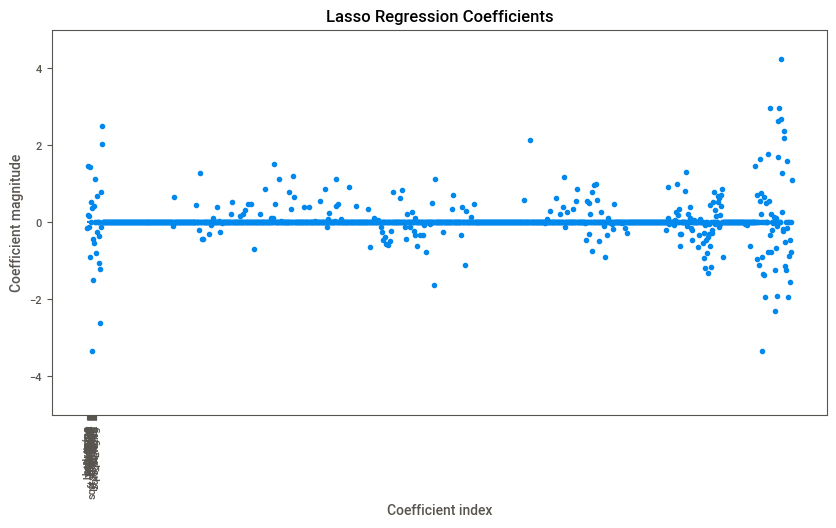

In [45]:
coefs = model_2.named_steps['classifier'].coef_
plt.figure(figsize=(10,5))
plt.plot(coefs.T, 'o')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.hlines(0, 0, X_train.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.title("Lasso Regression Coefficients")
plt.show()

Model 3: Lasso regression with C=0.01

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Lets start by defining this model

In [47]:
model_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000, random_state=42))
])

In [48]:
model_3.fit(X_train, y_train)


C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=2000, penalty='l1',
                                    random_state=42, solver='saga'))])

Predict and Test

In [49]:
train_preds = model_3.predict(X_train)
test_preds = model_3.predict(X_test)

train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)

How accurate are we?

In [50]:
print(f"Training accuracy: {train_score}")
print(f"Testing accuracy: {test_score}")


Training accuracy: 0.95320994794679
Testing accuracy: 0.9488780939162619


Confusion metrics

In [51]:
train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_test, test_preds)
print(f"Training confusion matrix:\n{train_confusion}")
print(f"Testing confusion matrix:\n{test_confusion}")

Training confusion matrix:
[[15995   132]
 [  677   486]]
Testing confusion matrix:
[[3961   33]
 [ 188  141]]


Plotting

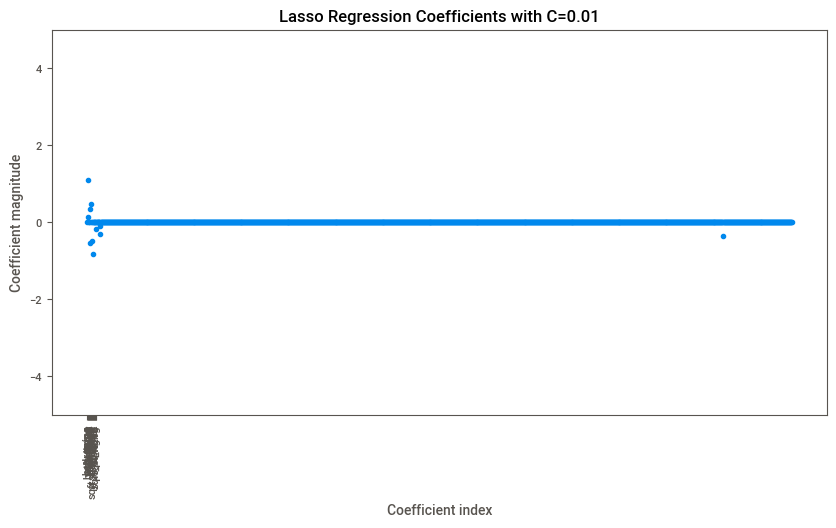

In [52]:
coefs = model_3.named_steps['classifier'].coef_
plt.figure(figsize=(10,5))
plt.plot(coefs.T, 'o')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.hlines(0, 0, X_train.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.title("Lasso Regression Coefficients with C=0.01")
plt.show()

Model 4: Lasso regression with optimal C value


In [53]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [54]:
model_4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(penalty='l1', Cs=10, cv=5, solver='saga', max_iter=2000, random_state=42))
])

lets fit the model

In [ ]:
model_4.fit(X_train, y_train)


C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\flame\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


predict and compute

In [ ]:
train_preds = model_4.predict(X_train)
test_preds = model_4.predict(X_test)

train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)


Are we accurate?

In [ ]:
print(f"Training accuracy: {train_score}")
print(f"Testing accuracy: {test_score}")


In [ ]:
Confusion matrix

In [ ]:
train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_test, test_preds)
print(f"Training confusion matrix:\n{train_confusion}")
print(f"Testing confusion matrix:\n{test_confusion}")


Plotting

In [ ]:
coefs = model_4.named_steps['classifier'].coef_
plt.figure(figsize=(10,5))
plt.plot(coefs.T, 'o')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.hlines(0, 0, X_train.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.title("Lasso Regression Coefficients with Optimal C")
plt.show()

what is the opimal C value

In [ ]:
print(f"Optimal C value: {model_4.named_steps['classifier'].C_[0]}")


Task 5

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


Defining and Fitting

In [ ]:
model_5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

model_5.fit(X_train, y_train)


Predicting

In [ ]:
train_preds = model_5.predict(X_train)
test_preds = model_5.predict(X_test)

train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)


were we accurate?

In [ ]:
print(f"Training accuracy: {train_score}")
print(f"Testing accuracy: {test_score}")


In [ ]:
confusion matrices

In [ ]:
train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_test, test_preds)
print(f"Training confusion matrix:\n{train_confusion}")
print(f"Testing confusion matrix:\n{test_confusion}")

Plot the tree (hope this is readable)

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model_5.named_steps['classifier'], filled=True, max_depth=3)
plt.show()

Task 6

lets start with loading some data

In [ ]:
regression_df = pd.read_csv("./data/kc_house_data_regression.csv")


lets predict

In [ ]:
test_preds_2 = model_2.predict(X_test)


compare indices of wrong predictions

In [ ]:
wrong_indices = y_test != test_preds_2


Lets select some rows corresponding to wrong predictions

In [ ]:
wrong_rows = regression_df.loc[X_test[wrong_indices].index]


Lets create a histogram of prices for wrong predictions

In [ ]:
wrong_rows['price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Prices for Wrong Predictions')
plt.show()
